# Packages

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

# Step 1. 스티커 구하기 or 만들기

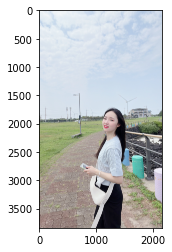

In [2]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/selfie.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # RGB 이미지로 바꿈.
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

# Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [3]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [4]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(1061, 1811) (1382, 2132)]]


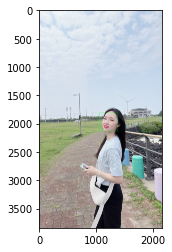

In [5]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [7]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생
print(list_landmarks)

68
[[(1129, 1920), (1118, 1945), (1111, 1973), (1110, 2002), (1112, 2032), (1119, 2062), (1126, 2090), (1135, 2119), (1154, 2137), (1187, 2145), (1231, 2142), (1274, 2132), (1315, 2114), (1344, 2087), (1363, 2051), (1379, 2014), (1395, 1974), (1137, 1881), (1148, 1871), (1164, 1872), (1181, 1877), (1197, 1888), (1231, 1894), (1259, 1890), (1289, 1895), (1316, 1909), (1333, 1931), (1201, 1926), (1192, 1946), (1181, 1965), (1169, 1985), (1159, 2001), (1166, 2007), (1174, 2012), (1186, 2014), (1201, 2015), (1149, 1918), (1160, 1913), (1173, 1916), (1182, 1928), (1169, 1927), (1156, 1924), (1246, 1942), (1263, 1936), (1279, 1940), (1294, 1951), (1276, 1952), (1259, 1948), (1143, 2038), (1150, 2030), (1160, 2028), (1170, 2034), (1183, 2034), (1204, 2045), (1228, 2063), (1199, 2076), (1176, 2079), (1163, 2076), (1151, 2070), (1145, 2056), (1148, 2040), (1158, 2038), (1169, 2042), (1181, 2044), (1220, 2061), (1179, 2064), (1167, 2061), (1155, 2055)]]


고개를 측면으로 틀고 있어서 모든 랜드마크가 나오지 않을 것이라 예상했지만, 모든 랜드마크가 나옴.<br>
왼쪽 얼굴의 턱 쪽 x축의 픽셀이 크게 차이나지 않음. 왼쪽 가장자리가 사진에 찍히지 않아서 그런 것같음.

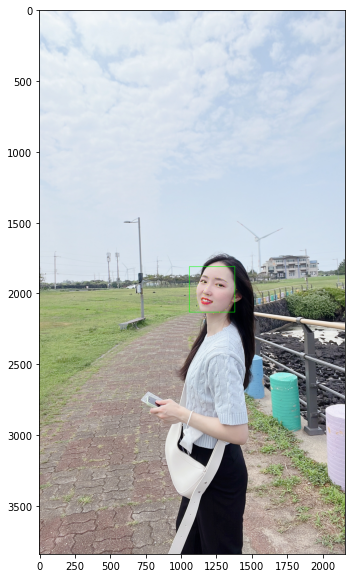

In [8]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.figure(figsize = (10, 10))
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

# Stpe 3. 스티커 적용 위치 확인하기

In [9]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(1061, 1811) (1382, 2132)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(1129, 1920), (1118, 1945), (1111, 1973), (1110, 2002), (1112, 2032), (1119, 2062), (1126, 2090), (1135, 2119), (1154, 2137), (1187, 2145), (1231, 2142), (1274, 2132), (1315, 2114), (1344, 2087), (1363, 2051), (1379, 2014), (1395, 1974), (1137, 1881), (1148, 1871), (1164, 1872), (1181, 1877), (1197, 1888), (1231, 1894), (1259, 1890), (1289, 1895), (1316, 1909), (1333, 1931), (1201, 1926), (1192, 1946), (1181, 1965), (1169, 1985), (1159, 2001), (1166, 2007), (1174, 2012), (1186, 2014), (1201, 2015), (1149, 1918), (1160, 1913), (1173, 1916), (1182, 1928), (1169, 1927), (1156, 1924), (1246, 1942), (1263, 1936), (1279, 1940), (1294, 1951), (1276, 1952), (1259, 1948), (1143, 2038), (1150, 2030), (1160, 2028), (1170, 2034), (1183, 2034), (1204, 2045), (1228, 2063), (1199, 2076), (1176, 2079), (1163, 2076), (1151, 2070), (1145, 2056), (1148, 2040), (1158, 2038), (1169, 2042), (1181, 2044), (1220, 2061), (1179, 2064), (1167, 2061), (1155, 2055)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (2132-1811+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1169, 1985)
(x,y) : (1169,1985)
(w,h) : (322,322)


# Step 4. 스티커 적용하기

코 끝과 고양이 수염 이미지의 중앙을 맞춰야 할 것같음.

고양이 수염이미지에서 배경은 0, 그림은 255로 출력되서 cv2.bitwise_not으로 픽셀값을 반전시킴

In [10]:
# 고양이수염 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 고양이 수염의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
# img_sticker = cv2.bitwise_not(img_sticker)
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(322, 322, 3)


In [11]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 1169
# y는 이미지에서 코 부위의 y값 = 1985
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 322
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 322
refined_x = x - w // 2 # 1169 - (322//2) = 1169-161 = 1008
refined_y = y - h // 2 # 1985 - (322//2) = 1824
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (1008,1824)


코 랜드마크에 고양이 수염 이미지의 중앙값이 오게 하기 위해서 고양이 수염 이미지의 시작 좌표를 정해줌.<br>
(코 랜드마크 x좌표 - (고양이수염너비 // 2), 코 랜드마크 y좌표 - (고양이수염높이 // 2))

고양이 수염이 이미지밖을 벗어나지 않지만 다른 원본 이미지가 들어왔을 때 에러가 발생할 수 있으므로 추가함.

In [12]:
# 고양이 이미지가 원본이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 고양이수염 이미지를 씌우기 위해 고양이수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (1008,1824)


In [13]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (1008,1824) 부터 (1008+322, 1824+322) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[1824:1824+322, 1008:1008+322]
# img_show[1824:2146, 1008:1330]
# 즉, x좌표는 1008~1330 / y좌표는 1824~2146가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 고양이수염 이미지에서 사용할 부분은 255이 아닌 색이 있는 부분을 사용합니다.
# 고양이수염 이미지에서 255이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 255인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 255일 경우(고양이수염에서 고양이수염 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

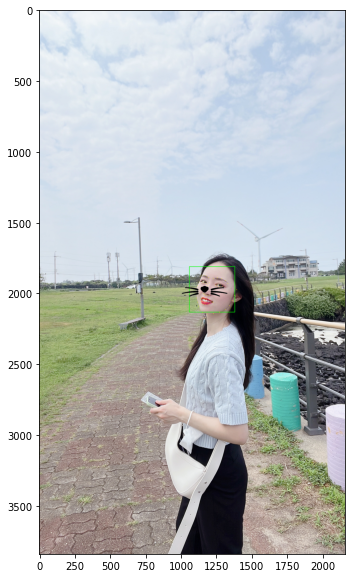

In [14]:
# 고양이수염 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 고양이수염 이미지를 덧붙인 이미지가 나오게 된다.)
plt.figure(figsize = (10, 10))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

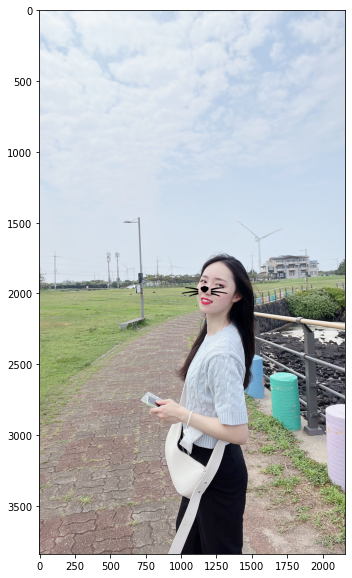

In [15]:
# 위에서 설명했으므로 생략
# 고양이수염 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.figure(figsize = (10, 10))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 고양이수염 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# Step 5. 문제점 찾아보기

- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
    + 얼굴의 각도에 따라 스티커가 회전해야 함. 회전을 할 때는 눈썹 끝 랜드마크(17, 26)나 (0, 16)랜드마크를 이용하여 얼굴이 얼마나 기울어진지 계산한다음. cv2.warpAffine를 이용하여 스티커를 기울여줄 수 있을 것같음.
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
    + 멀리서 촬영하면 얼굴을 확대한다고 해도 landmark detection이 어려울 것같음.
- 실행 속도가 중요할까요?
    + 앱으로 만드는 경우에는 중요함. 원하는 포즈를 취하고, 스티커를 기다리는 시간이 길다면 사용자들이 어플을 사용하지 않을 것같음.
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
    + 스티커가 얼굴에 생기지 않고, 다른 곳에 생긴다고 해도 웃으면서 넘길 수 있을 것같음. 정확도보다 속도가 더 중요하다고 생각함.

---
얼굴의 각도가 약간 기울어져 있어서, 스티커도 기울이면 좋을 것같다. 위에서 기술한 스티커를 기울이는 방법을 구현했다면 더 어울리는 이미지가 완성됐을 것같음.